# Employee Attrition Analysis – EDA

This notebook performs exploratory data analysis (EDA) on the IBM HR Analytics employee attrition dataset.

In [1]:
# Cell 1: Imports & basic setup
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8-darkgrid")
sns.set(font_scale=1.0)

In [2]:
# Cell 2: Load dataset
# Make sure this notebook is in the same folder as IBM_HR_Analytics.xlsx

df = pd.read_excel("IBM_HR_Analytics.xlsx")

print("Shape:", df.shape)
df.head()

Shape: (1470, 35)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Cell 3: Basic info & dtypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
# Cell 4: Check missing values

df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [5]:
# Cell 5: Summary statistics for numeric features

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", num_cols)

df[num_cols].describe()

Numeric columns: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Attrition
No     1233
Yes     237
Name: count, dtype: int64


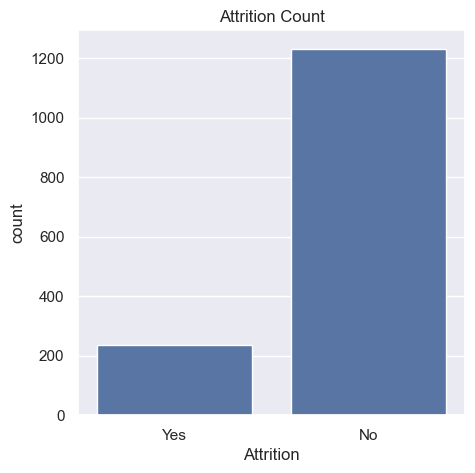

In [6]:
# Cell 6: Target variable distribution (Attrition)

if "Attrition" in df.columns:
    print(df["Attrition"].value_counts())
    plt.figure(figsize=(5,5))
    sns.countplot(data=df, x="Attrition")
    plt.title("Attrition Count")
    plt.show()
else:
    print("Column 'Attrition' not found. Please check column names.")

In [7]:
# Cell 7: Categorical columns overview

cat_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical columns:", cat_cols)

for col in cat_cols:
    print(f"\nColumn: {col}")
    print(df[col].value_counts())

Categorical columns: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']

Column: Attrition
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Column: BusinessTravel
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: count, dtype: int64

Column: Department
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64

Column: EducationField
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: count, dtype: int64

Column: Gender
Gender
Male      882
Female    588
Name: count, dtype: int64

Column: JobRole
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager   

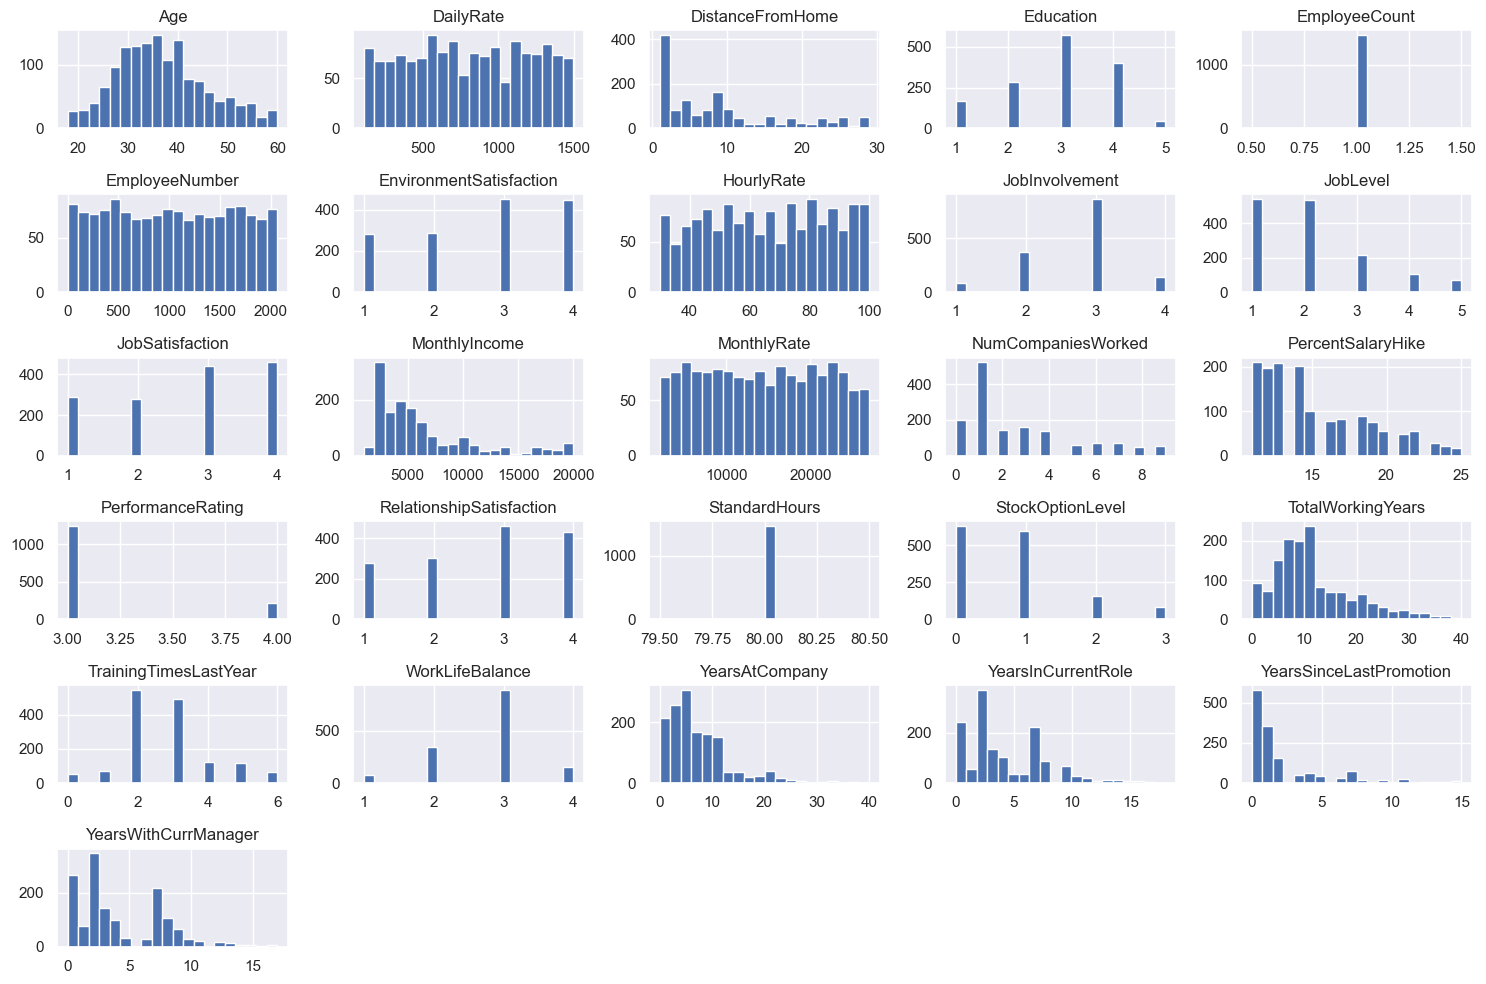

In [8]:
# Cell 8: Histograms for numerical columns

if num_cols:
    df[num_cols].hist(bins=20, figsize=(15,10))
    plt.tight_layout()
    plt.show()
else:
    print("No numeric columns found.")

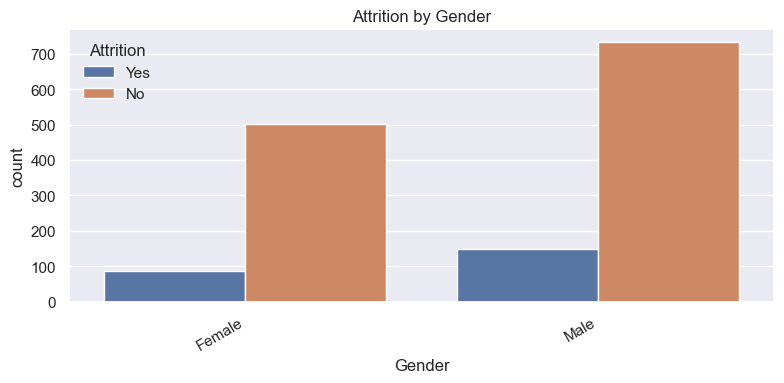

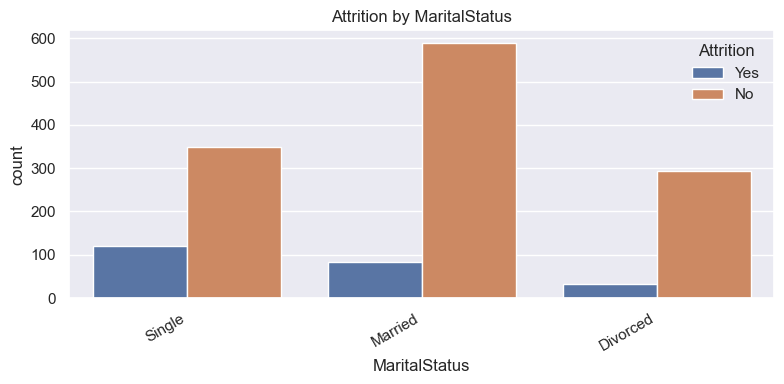

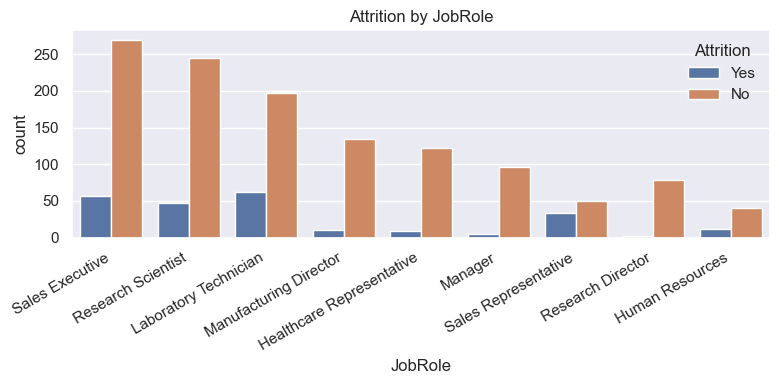

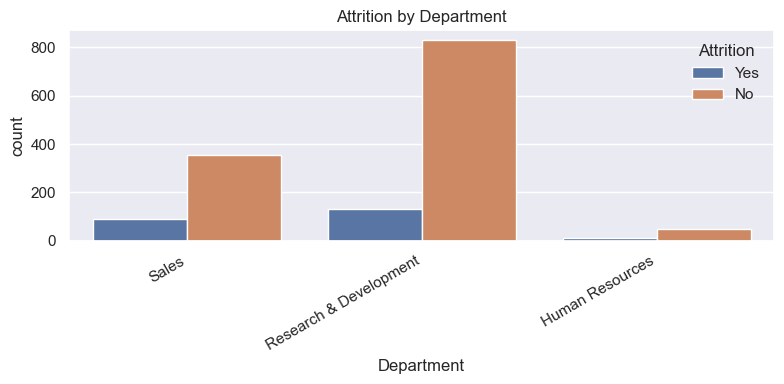

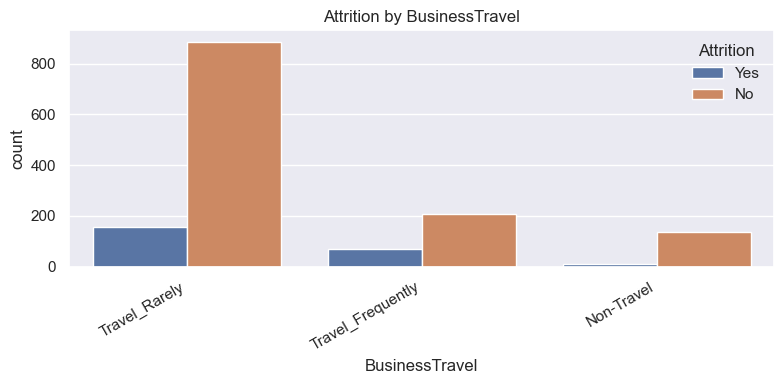

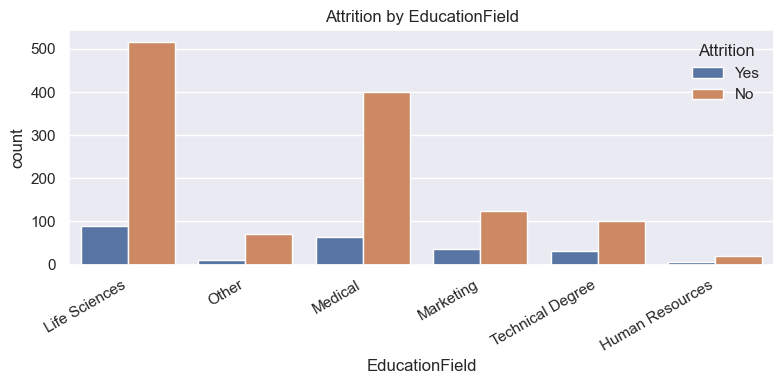

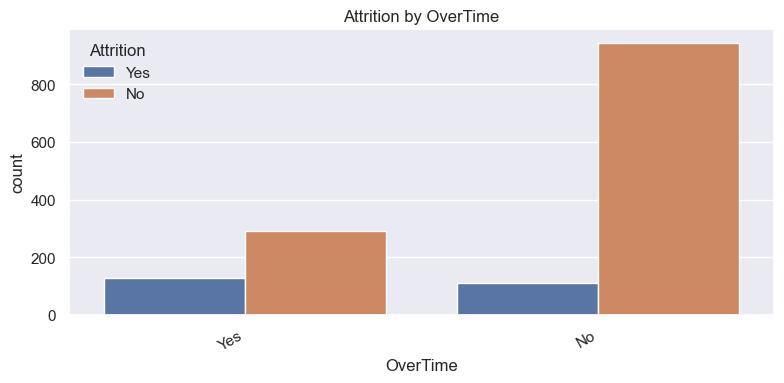

In [9]:
# Cell 9: Attrition vs key categorical variables

key_cat_cols = [col for col in [
    "Gender", "MaritalStatus", "JobRole", "Department", "BusinessTravel",
    "EducationField", "OverTime"
] if col in df.columns]

for col in key_cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, hue="Attrition")
    plt.title(f"Attrition by {col}")
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

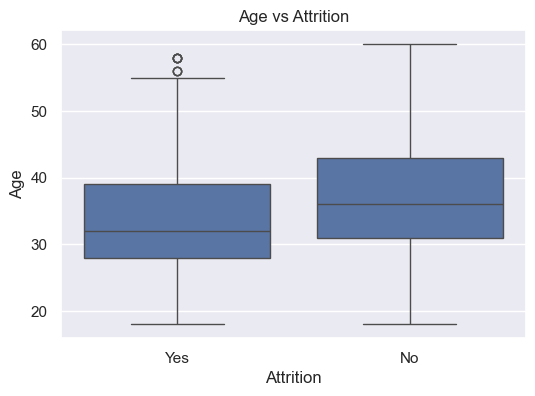

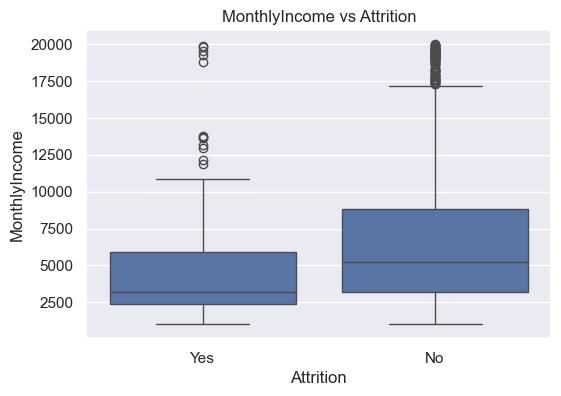

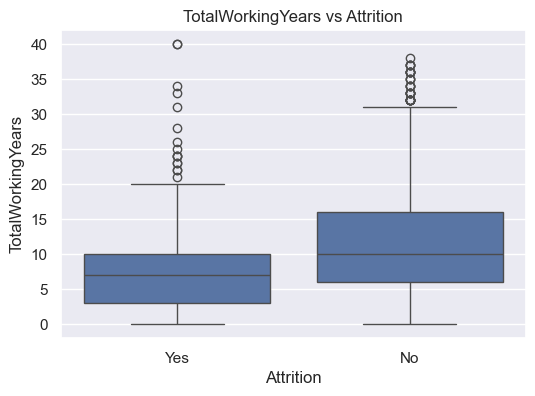

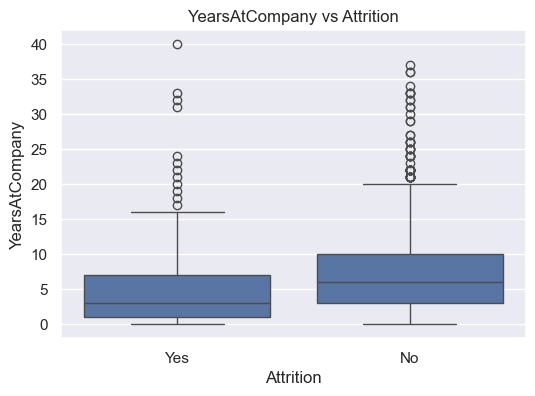

In [10]:
# Cell 10: Boxplots for selected numeric features vs Attrition

for col in ["Age", "MonthlyIncome", "TotalWorkingYears", "YearsAtCompany"]:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(data=df, x="Attrition", y=col)
        plt.title(f"{col} vs Attrition")
        plt.show()

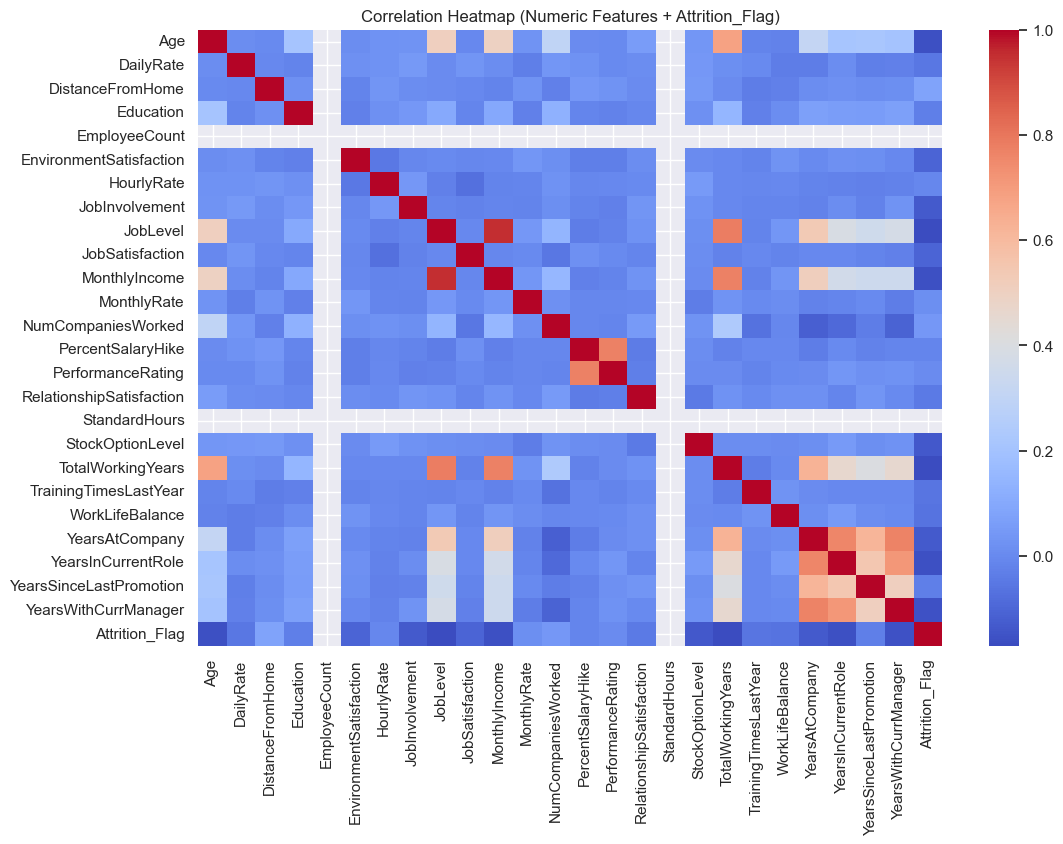

In [11]:
# Cell 11: Correlation heatmap (with Attrition encoded)

if "Attrition" in df.columns:
    df_corr = df.copy()
    df_corr["Attrition_Flag"] = df_corr["Attrition"].map({"Yes": 1, "No": 0})
    corr_cols = [c for c in df_corr.select_dtypes(include=[np.number]).columns if c.lower() not in ["employeenumber", "employeeid"]]

    plt.figure(figsize=(12,8))
    sns.heatmap(df_corr[corr_cols].corr(), cmap="coolwarm", annot=False)
    plt.title("Correlation Heatmap (Numeric Features + Attrition_Flag)")
    plt.show()
else:
    print("No 'Attrition' column to encode for correlation.")

In [12]:
# Cell 12: Save a copy of EDA-ready data (optional)

# If you did not modify df, this just saves the original with any new columns we added
output_path = "employee_attrition_eda_clean.csv"
df.to_csv(output_path, index=False)
print(f"EDA data saved as {output_path}")

EDA data saved as employee_attrition_eda_clean.csv
